<strong>Aluno</strong>: Victor São Paulo Ruela

## Regressão do conjunto de dados Boston Housing com Adaline

O conjunto de dados Boston Housing é um problema de benchmark para algoritmos de regressão bastante utilizando na literatura. Ele é composto por 13 atributos numéricos que representam informações coletadas pelo serviço de censo dos estados unidos para a região de Boston, para os quais devemos prever o preço mediano de uma casa. Mais informações sobre esta base de dados pode ser encontrada em [1], artigo no qual ele foi originalmente publicado.

O objetivo deste exercício é avaliar o modelo Adaline para sua solução, usando como guia as notas de aula. Inicialmente, o modelo será treinado utilizando todas as 13 variávieis, e em seguida variáveis serão removidas como forma de reduzir a complexidade do modelo, eliminando redundâncias.


In [21]:
# Import the necessary packages
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(1234)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
# load the Boston dataset
data = load_boston()
X, y, columns = data['data'], data['target'], data['feature_names']

# plot statistics
pd.DataFrame(X, columns=columns).describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Conforme visto na tabela anterior, os atributos possuem dimensões bem diferentes. Dessa forma, os dados serão normalizados para o intervalo de 0 a 1, conforme sugerido também nas notas de aula.

In [23]:
# normalize the data 
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1,1))


Em seguida, é feita a implementação do modelo Adaline, conforme as notas de aula.

In [24]:
# ADALINE implementation
class Adaline:
    def __init__(self, eta=0.01, tol=1e-6, max_epochs=1000):
        self.eta = eta
        self.tol = tol
        self.max_epochs = max_epochs

    def predict(self, X):
        return X @ self.w

    def fit(self, X, y):
        N, m = X.shape
        epochs = 0
        w = np.random.rand(m)
        error_epoch = []
        ediff = np.Inf

        while((epochs < self.max_epochs) & (ediff > self.tol)):
            xseq = np.arange(N)
            np.random.shuffle(xseq)
            ei2 = 0
            for iseq in xseq:
                erro = (y[iseq] - X[iseq, :] @ w)
                w = w + self.eta * erro * X[iseq,:]
                ei2 = ei2 + erro ** 2

            ei2 = ei2 / N
            error_epoch.append(ei2)
            epochs = epochs + 1

            if(epochs > 1):
                ediff = np.abs(ediff - ei2)
            else:
                ediff = ei2

        self.w = w
        return w, error_epoch

    def fit_predict(self, X_train, y_train, X_test):
        self.fit(X_train, y_train)
        return self.predict(X_test)




Com a implementação realizada, seguimos para o treinamento do modelo. Inicialmente, geramos separamos o nosso conjunto de dados entre treinamento e teste. Será considerada um razão de 80% (404 treinamento/ 102 teste).

In [25]:
# split training data randomly
def train_test_split(X, y, ratio=0.8):
    N = len(y)
    x_rand = np.arange(N)
    np.random.shuffle(x_rand)
    i_split = int(np.floor(ratio * N))

    x_train, x_test = x_rand[:i_split], x_rand[i_split:]
    return X[x_train,:], y[x_train], X[x_test,:], y[x_test]

X_train, y_train, X_test, y_test = train_test_split(X_scaled, y_scaled)

Em seguida, treinamos o Adaline considerando todos os atributos.

MSE training: [0.00986901]


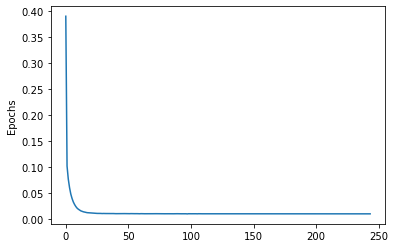

In [26]:
# Train the model
adaline = Adaline(tol=1e-6) 
w, error = adaline.fit(X_train, y_train)

# Plot the training error
fig, ax = plt.subplots()
ax.plot(error)
ax.set_ylabel('Error')
ax.set_ylabel('Epochs')
fig.show()
print(f'MSE training:', error[-1])

In [29]:

def evaluate_model(model, X_train, y_train, X_test, y_test):
    def augment(x): return np.hstack((-np.ones((len(x), 1)), x.reshape(-1,1)))
    # prediction
    y_test_pred = adaline.predict(X_test)
    y_train_pred = adaline.predict(X_train)
    y_test_aug = augment(y_test)
    y_train_aug = augment(y_train)

    # R2 score
    r2_test, r2_train = r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)
   
    fig, ax = plt.subplots(2,2, figsize=(12, 10))
    adareg = Adaline()
    
    # actual vs prediction - training
    ax[0,0].scatter(y_test, y_test_pred, color='k')
    ax[0,0].plot(y_test, adareg.fit_predict(y_test_aug, y_test_pred, y_test_aug), 'r-')
    ax[0,0].set_xlabel('Real')
    ax[0,0].set_ylabel('Prediction')
    ax[0,0].set_title(f'Test: $R^2$: {r2_test}')

    # actual vs prediction - test
    ax[0,1].scatter(y_train, y_train_pred, color='k')
    ax[0,1].plot(y_train, adareg.fit_predict(y_train_aug, y_train_pred, y_train_aug), 'r-')
    ax[0,1].set_xlabel('Real')
    ax[0,1].set_ylabel('Prediction')
    ax[0,1].set_title(f'Train: $R^2$: {r2_train}')

    # values - training
    ax[1,1].plot(y_train, 'b')
    ax[1,1].plot(y_train_pred, 'r')
    ax[1,1].set_xlabel('Index')
    ax[1,1].set_ylabel('y')

    # values - test
    ax[1,0].plot(y_test, 'b')
    ax[1,0].plot(y_test_pred, 'r')
    ax[1,0].set_xlabel('Index')
    ax[1,0].set_ylabel('y')


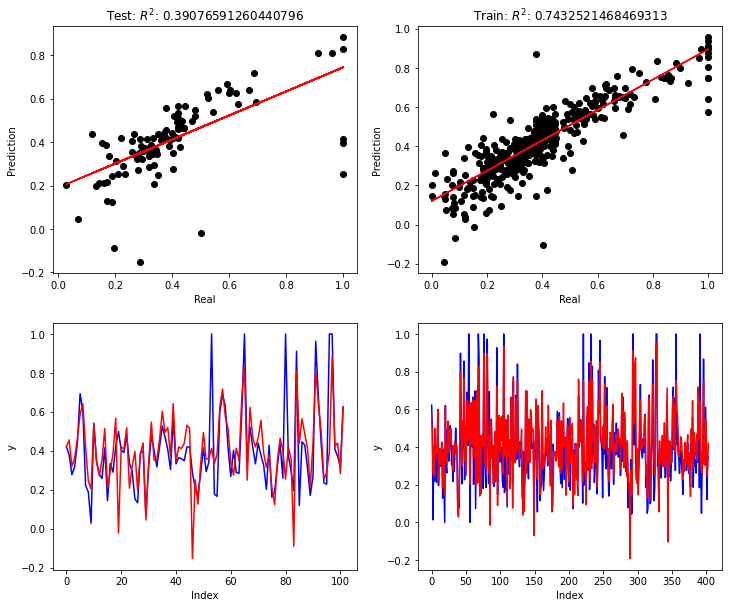

In [30]:
# Evalute the model
evaluate_model(adaline, X_train, y_train, X_test, y_test)


Através da avalição da resposta par os dados de teste e de treinamento, podemos notar que o modelo conseguir aproximar bem os dados de treinamento, apresetando um coeficiente de regressão $R^2 = 0.79$. Para o conjunto de testes, o modelo não conseguiu generalizar muito bem e obteve um coeficiente $R^2 = 0.39$. Observando os dados, nota-se uma disperssão grande nos dados de teste, o que é fruto da escolha aletarória da partição dos dados de teste/treinamento. Vale a pena ressaltar que para resultados mais completos, seria interessante a realização de validação cruzada no treinamento do modelo seguida de uma análise estatística. 

A seguir, atributos com alta correlação serão removidos do treinamento do modelo, uma vez que estes seriam redundantes para o modelo. Para auxiliar nesta escolha, é apresentado a seguir a gráfico de correlação entre as variáveis.

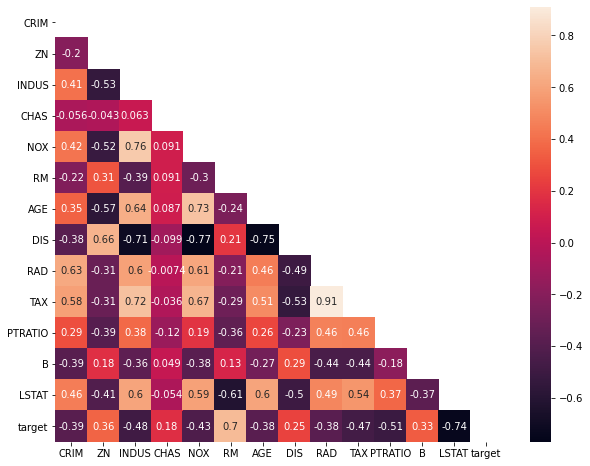

In [31]:
# plot the correlation matrix
def to_pandas(X, y, columns):
    data_pd = pd.DataFrame(X, columns=columns)
    data_pd['target'] = y
    return data_pd

def plot_correlation(X, y, columns):
    fig, ax = plt.subplots(figsize=(10,8))
    corr = to_pandas(X,y,columns).corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    sns.heatmap(corr, mask=mask, annot=True, ax=ax)
    fig.show()

plot_correlation(X_scaled,y_scaled,columns)

A primeria variável a ser removida será a <strong>DIS</strong>, uma vez que ela possui baixa correlação com a saída (0.25) e alta correlação com as variáveis INDUS, NOX e AGE.

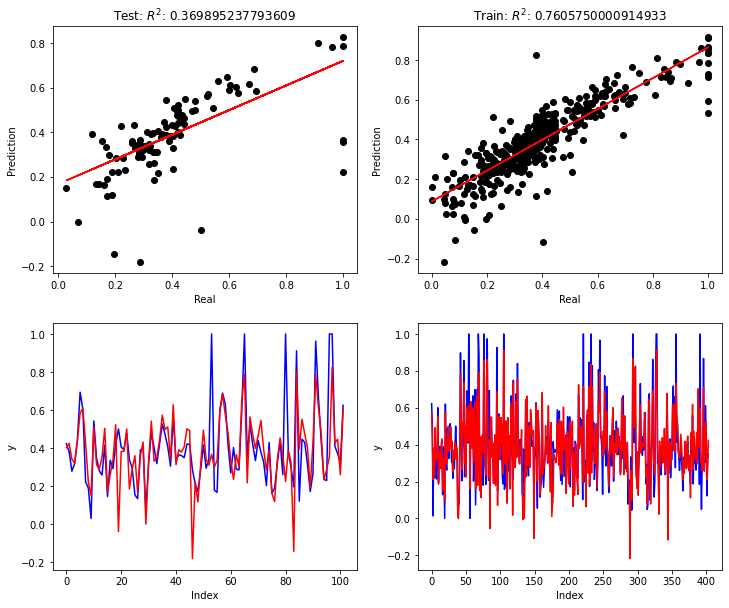

In [46]:
# remove high correlated variables
# DIS is highly correlated with each INDUS, NOX e AGE (~ -0.7)
# Train the model
cols_to_remove = ['DIS']
mask = ~np.isin(columns, cols_to_remove)
cols_to_include = np.arange(len(columns))[mask]

X_train_r = X_train[:, cols_to_include]
X_test_r = X_test[:, cols_to_include]

adaline = Adaline(tol=1e-6)  
w, error = adaline.fit(X_train_r, y_train)
evaluate_model(adaline, X_train_r, y_train, X_test_r, y_test)


Conforme pode ser visto na figura acima, houve uma ligeira queda no coeficiente de regressão para os conjuntos de dados, porém sem muita perdas em relação ao conjunto completo de atributos. 

Seguindo o mesmo princípio, a próxima variável a ser removida é a NOX, pois ela possui alta correlação com as variáveis TAX, RAD e AGE.

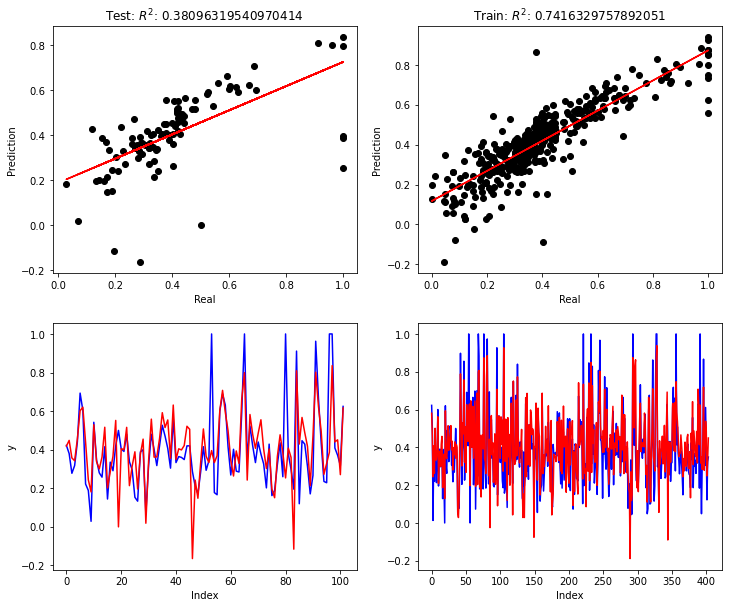

In [43]:
# remove high correlated variables
# Train the model
cols_to_remove = ['DIS', 'NOX']
mask = ~np.isin(columns, cols_to_remove)
cols_to_include = np.arange(len(columns))[mask]

X_train_r = X_train[:, cols_to_include]
X_test_r = X_test[:, cols_to_include]

adaline = Adaline(tol=1e-6)  
w, error = adaline.fit(X_train_r, y_train)
evaluate_model(adaline, X_train_r, y_train, X_test_r, y_test)


Conforme os resultados, a remoção destas variávies não resultou em grande perda de qualidade do modelo. Como último teste, todas as variávies com correlação maior que 0.7 serão removidas do treinamento.

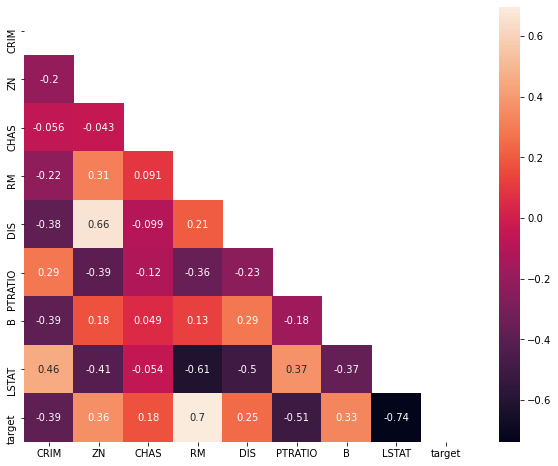

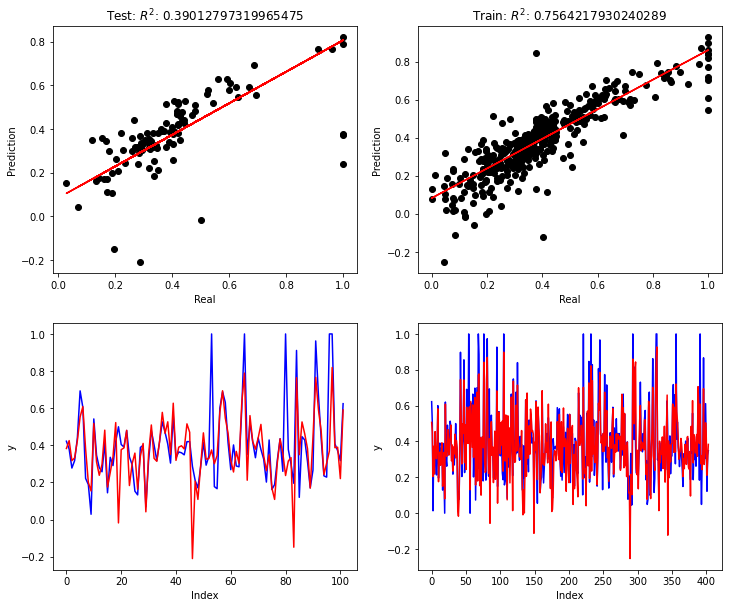

In [50]:
corr = to_pandas(X,y,columns).corr()
high_corr_pairs = []
cols_to_remove = []
for c1 in columns:
  for c2 in columns:
    if (c1 != c2) & (c1 not in cols_to_remove) & ((corr[c1][c2]) > 0.7) & (c1 != 'target') & (c2 != 'target'):
      high_corr_pairs.append((c1, c2))
      cols_to_remove.append(c1)

high_corr_pairs = pd.DataFrame(high_corr_pairs, columns=['p1', 'p2'])
high_corr_pairs['target_corr_p1'] = high_corr_pairs['p1'].apply(lambda x: np.abs(corr[x]['target']))
high_corr_pairs['target_corr_p2'] = high_corr_pairs['p2'].apply(lambda x: np.abs(corr[x]['target']))

cols_to_remove = list(set(cols_to_remove))

mask = ~np.isin(columns, cols_to_remove)
cols_to_include = np.arange(len(columns))[mask]

X_train_r = X_train[:, cols_to_include]
X_test_r = X_test[:, cols_to_include]

plot_correlation(X_scaled[:, cols_to_include],y_scaled,columns[cols_to_include])

adaline = Adaline(tol=1e-6)  
w, error = adaline.fit(X_train_r, y_train)
evaluate_model(adaline, X_train_r, y_train, X_test_r, y_test)


É muito interessante notar que agora, com apenas 8 das 13 variáveis é possível obter resultados bem próximos de quando era utilizado o conjunto completo. Isso mostra a importância de realizar a seleção das variávies para treinamento do modelo. 

## Referências
[1] Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.